![Zip Codes](../images/metro-atlanta-zip-codes-map.jpeg)

# Real Estate Investment Project P2: Preprocessing, Modeling, Evaluation

**Author:** Sierra Stanton
***

### Below we'll replicate the initial steps of our exploration notebook to properly load data.

# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
# import our chosen packages
import pandas as pd
import numpy as np
import pandas.tseries
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib.pylab import rcParams
import seaborn as sns
import datetime as dt

%matplotlib inline

In [2]:
# import our Zillow dataset
df_z = pd.read_csv('../data/zillow_data.csv')
df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [3]:
df_z.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


## Step 2: Filter data for zipcodes specific to Atlanta

In [4]:
# narrow our zip codes down for relevancy

df_atl = df_z.loc[(df_z['Metro'] == 'Atlanta') & (df_z['City'] == 'Atlanta')] # 12 rows, 272 columns
df_atl

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
227,71050,30331,Atlanta,GA,Atlanta,Fulton,228,97100.0,97700.0,98400.0,...,130300,131300,132700,134000,135100,137000,139400,140800,141500,141600
1097,71029,30309,Atlanta,GA,Atlanta,Fulton,1098,260400.0,261700.0,262900.0,...,780200,785900,797400,807600,813500,819200,824900,834500,850300,860700
1223,71043,30324,Atlanta,GA,Atlanta,Fulton,1224,189400.0,190800.0,192300.0,...,506500,509600,515100,519600,523900,528500,532600,537900,543700,545700
1758,71036,30316,Atlanta,GA,Atlanta,Fulton,1759,62300.0,62300.0,62300.0,...,240900,244200,247900,251700,255300,258800,261600,264300,268700,272500
1787,71025,30305,Atlanta,GA,Atlanta,Fulton,1788,297200.0,299000.0,300900.0,...,860000,863400,868200,871200,872400,876800,885600,892900,897600,898200
2757,71028,30308,Atlanta,GA,Atlanta,Fulton,2758,138700.0,139400.0,140100.0,...,524200,529000,539200,547200,557000,570500,581000,585900,594000,599300
3261,71026,30306,Atlanta,GA,Atlanta,Fulton,3262,223100.0,225200.0,227400.0,...,733900,737500,744700,751200,755000,760300,766600,773200,781700,787000
4455,71046,30327,Atlanta,GA,Atlanta,Fulton,4456,515500.0,515900.0,516300.0,...,1135600,1140900,1152100,1158400,1158000,1162000,1173000,1173200,1168400,1165700
4643,71027,30307,Atlanta,GA,Atlanta,Fulton,4644,158900.0,159700.0,160500.0,...,539700,542300,544000,547600,554300,563200,569700,575400,582900,587100
6650,71037,30317,Atlanta,GA,Atlanta,Fulton,6651,51800.0,52500.0,53200.0,...,362500,362500,362300,366000,372400,379200,384900,388400,390400,391600


In [5]:
df_atl

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
227,71050,30331,Atlanta,GA,Atlanta,Fulton,228,97100.0,97700.0,98400.0,...,130300,131300,132700,134000,135100,137000,139400,140800,141500,141600
1097,71029,30309,Atlanta,GA,Atlanta,Fulton,1098,260400.0,261700.0,262900.0,...,780200,785900,797400,807600,813500,819200,824900,834500,850300,860700
1223,71043,30324,Atlanta,GA,Atlanta,Fulton,1224,189400.0,190800.0,192300.0,...,506500,509600,515100,519600,523900,528500,532600,537900,543700,545700
1758,71036,30316,Atlanta,GA,Atlanta,Fulton,1759,62300.0,62300.0,62300.0,...,240900,244200,247900,251700,255300,258800,261600,264300,268700,272500
1787,71025,30305,Atlanta,GA,Atlanta,Fulton,1788,297200.0,299000.0,300900.0,...,860000,863400,868200,871200,872400,876800,885600,892900,897600,898200
2757,71028,30308,Atlanta,GA,Atlanta,Fulton,2758,138700.0,139400.0,140100.0,...,524200,529000,539200,547200,557000,570500,581000,585900,594000,599300
3261,71026,30306,Atlanta,GA,Atlanta,Fulton,3262,223100.0,225200.0,227400.0,...,733900,737500,744700,751200,755000,760300,766600,773200,781700,787000
4455,71046,30327,Atlanta,GA,Atlanta,Fulton,4456,515500.0,515900.0,516300.0,...,1135600,1140900,1152100,1158400,1158000,1162000,1173000,1173200,1168400,1165700
4643,71027,30307,Atlanta,GA,Atlanta,Fulton,4644,158900.0,159700.0,160500.0,...,539700,542300,544000,547600,554300,563200,569700,575400,582900,587100
6650,71037,30317,Atlanta,GA,Atlanta,Fulton,6651,51800.0,52500.0,53200.0,...,362500,362500,362300,366000,372400,379200,384900,388400,390400,391600


In [6]:
# check for missing values
df_atl.isnull().values.any()

False

# Step 3: Data Preprocessing for Modeling

### Clean Up and Prepare Our Dataset
With this dataframe, we'll take the following actions:
1. Drop irrelevant columns and rename key columns
2. Melt our data by transitioning from wide to long format
3. Reset index as needed
4. Convert the column values for datetimes as a pandas series of datetime objects
5. Slice data to only include 2010-18
6. Separate our data according to ZIP code

In [7]:
# create functions to prepare our dataframe

# removes our irrelevant columns, renames as needed, reset our index
def condense_df(df):
    df_condensed = df.drop(['RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], axis=1)
    df_condensed.rename(columns={'RegionName': 'Zipcode'}, inplace=True)
    df_condensed = df_condensed.reset_index(drop=True)
    return df_condensed

# changes our data from wide to long format for processing
def melt_data(df):
    melted = pd.melt(df, id_vars=['Zipcode'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

# combine the above functions to run in sync, and transform our dataset
def multi_index_df(df):
    df_full = condense_df(df) # condense our df
    df_full_melt = melt_data(df_full) # melt our df
    ts = df_full_melt.set_index('time')
    df_comprehensive = ts.groupby(['Zipcode']).resample('M').sum()
    df_comprehensive = df_comprehensive.drop('Zipcode', axis=1)
    return df_comprehensive

# converts our time index to a DatetimeIndex
def get_datetimes(df):
    return pd.to_datetime(df.index, format='%Y-%m')

In [8]:
# run comprehensive function
df_atl2 = multi_index_df(df_atl)

# preview our dataframe
df_atl2.head()

value
Zipcode time                
30305   1996-04-30  297200.0
        1996-05-31  299000.0
        1996-06-30  300900.0
        1996-07-31  302700.0
        1996-08-31  304500.0

In [9]:
# reset our index
df_atl = df_atl2.reset_index(level=0)

# preview our dataframe
df_atl.head()

,Zipcode,value
time,,
1996-04-30,30305,297200.0
1996-05-31,30305,299000.0
1996-06-30,30305,300900.0
1996-07-31,30305,302700.0
1996-08-31,30305,304500.0


In [10]:
# rename columns for clarity
df_atl.rename(columns={'time': 'Date'}, inplace=True)
df_atl.rename(columns={'value': 'Average Price'}, inplace=True)
df_atl.head()

,Zipcode,Average Price
time,,
1996-04-30,30305,297200.0
1996-05-31,30305,299000.0
1996-06-30,30305,300900.0
1996-07-31,30305,302700.0
1996-08-31,30305,304500.0


In [11]:
get_datetimes(df_atl)

DatetimeIndex(['1996-04-30', '1996-05-31', '1996-06-30', '1996-07-31',
               '1996-08-31', '1996-09-30', '1996-10-31', '1996-11-30',
               '1996-12-31', '1997-01-31',
               ...
               '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31',
               '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28',
               '2018-03-31', '2018-04-30'],
              dtype='datetime64[ns]', name='time', length=3180, freq=None)

The output above shows that our dataset clearly fulfills the indexing requirements.

### Split data to only include an eight year time span between 2010-18

In our prior __[exploratory notebook](./investment_analysis_eda.ipynb)__, we determined that when the housing crisis came to head in 08', Atlanta ZIP codes were indeed affected. We'd like to remove data right around that time period since we don't consider it an accurate gauge of home values for future planning. Let's split this data and remove an unhelpful trend.

In [12]:
# remove housing data prior to 2010
df_atl = df_atl.loc[df_atl.index >= '2010-04']
df_atl.head()

,Zipcode,Average Price
time,,
2010-04-30,30305,605400.0
2010-05-31,30305,600000.0
2010-06-30,30305,599400.0
2010-07-31,30305,599700.0
2010-08-31,30305,603800.0


### Separate according to Zipcode

We need to ensure that pricing is what's fed into our models, so eventually we need to eliminate our ZIP code column. In order to ensure we don't use the valuable comparisons that will result across ZIP codes, we'll separate our data according to said ZIP.

### Create dictionary for each ZIP with associated home values over time

In [13]:
# create empty dictionary
atl_zips = {}

# create list of unique ZIP codes
ls_unique_zips = df_atl.Zipcode.unique()
ls_unique_zips

array([30305, 30306, 30307, 30308, 30309, 30316, 30317, 30324, 30326,
       30327, 30331, 30363])

In [14]:
# loop through to associate home values with each ZIP
for code in ls_unique_zips: 
    zip_split = (df_atl[df_atl['Zipcode']==code]['Average Price'].copy())
    zip_split.name = code 
    atl_zips[code] = zip_split
    
# preview our results
display(atl_zips.keys())
atl_zips[30305]

dict_keys([30305, 30306, 30307, 30308, 30309, 30316, 30317, 30324, 30326, 30327, 30331, 30363])

time
2010-04-30    605400.0
2010-05-31    600000.0
2010-06-30    599400.0
2010-07-31    599700.0
2010-08-31    603800.0
                ...   
2017-12-31    876800.0
2018-01-31    885600.0
2018-02-28    892900.0
2018-03-31    897600.0
2018-04-30    898200.0
Name: 30305, Length: 97, dtype: float64

In [15]:
# create re-formatted dataframe that displays data across ZIP codes
zip_split_df = pd.DataFrame(atl_zips)
zip_split_df.head()

,30305,30306,30307,30308,30309,30316,30317,30324,30326,30327,30331,30363
time,,,,,,,,,,,,
2010-04-30,605400.0,489600.0,337700.0,294400.0,528500.0,141600.0,185900.0,343700.0,410400.0,875400.0,106600.0,210000.0
2010-05-31,600000.0,488700.0,337100.0,288300.0,527600.0,141100.0,185400.0,341300.0,398300.0,870300.0,101600.0,208600.0
2010-06-30,599400.0,488500.0,337400.0,286100.0,529000.0,141100.0,183200.0,341300.0,392200.0,872500.0,98500.0,210200.0
2010-07-31,599700.0,487800.0,336300.0,282700.0,528600.0,141200.0,179900.0,340000.0,387100.0,873300.0,95900.0,209700.0
2010-08-31,603800.0,487800.0,335100.0,280500.0,530600.0,140500.0,175600.0,337700.0,379900.0,875300.0,94500.0,209700.0


In [17]:
zip_split_df[30305]

time
2010-04-30    605400.0
2010-05-31    600000.0
2010-06-30    599400.0
2010-07-31    599700.0
2010-08-31    603800.0
                ...   
2017-12-31    876800.0
2018-01-31    885600.0
2018-02-28    892900.0
2018-03-31    897600.0
2018-04-30    898200.0
Name: 30305, Length: 97, dtype: float64

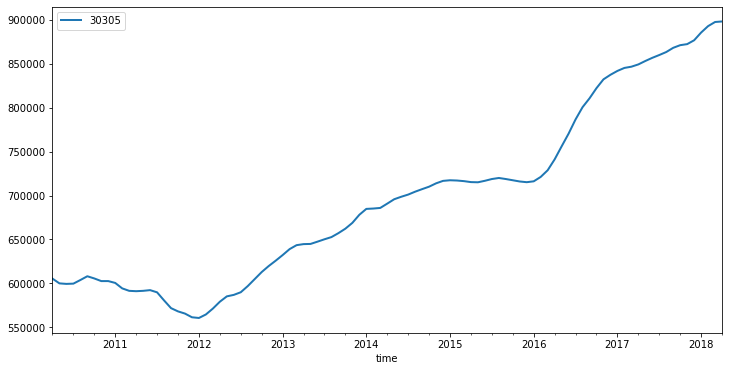

In [18]:
ts = zip_split_df[30305].copy()
ax= ts.plot(figsize=(12,6), linewidth=2, fontsize=10)
ax.legend()
plt.show()

## Stationarity Check

Lucky for us, the corresponding home values we have for each ZIP code has already gone through a degree of this to date.

**Zillow Home Value Index (ZHVI)**: A smoothed, seasonally adjusted measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range.

Let's test this using values across our ZIP codes.

In [19]:
comp_average = df_atl.groupby('time')['Average Price'].mean()
comp_average.head()

time
2010-04-30    377433.333333
2010-05-31    374025.000000
2010-06-30    373283.333333
2010-07-31    371850.000000
2010-08-31    370916.666667
Name: Average Price, dtype: float64

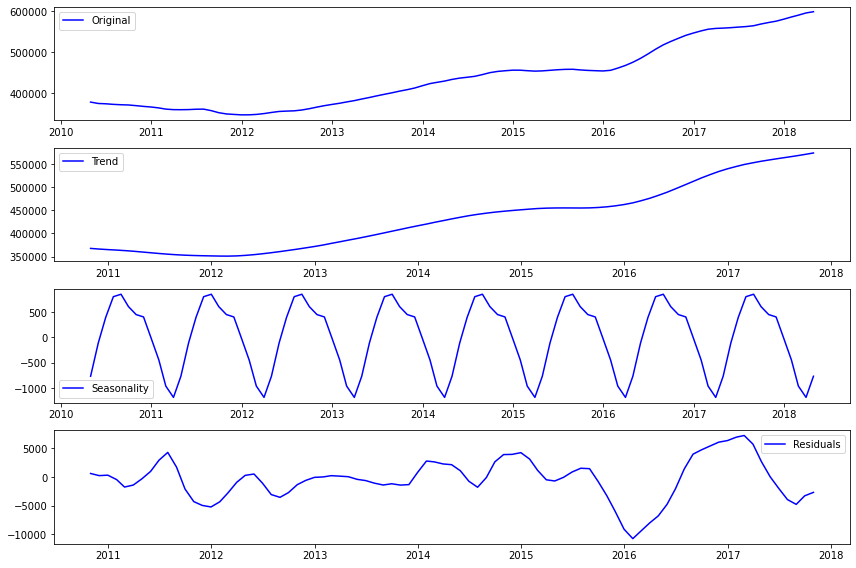

In [20]:
decomposition = sm.tsa.seasonal_decompose(comp_average, model='additive')

# Gather the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(comp_average, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

### Run a Dickey-Fuller test to check for stationarity

In [21]:
def test_stationarity(timeseries):
    roll_mean = timeseries.rolling(window=8, center=False).mean() # 8 year span
    roll_std = timeseries.rolling(window=8, center=False).std()
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

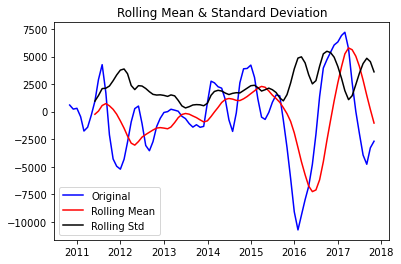

Results of Dickey-Fuller Test:
Test Statistic                 -4.689849
p-value                         0.000088
#Lags Used                      8.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64


In [22]:
ts_log_decomp = residual
ts_log_decomp.dropna(inplace=True)
test_stationarity(ts_log_decomp)

The Test Statistic is less than the 'Critical Value' and the p-value is less than 0.5 which indicates that the monthly average (as recorded by Zillow) is stationary. It's worth noting this is a rejection of the null hypothesis. We do want to note the clearly increasing trend shown above and further work could include using techniques to remove said trend and re-insert it into a high-performing model. With more time, we'd also like to run through each ZIP code separately to check for stationarity and perform any needed next steps.

### Train Test Split

In [24]:
train_dict = {} # 6 years, 75%
for name in ls_unique_zips:
    temp_train = atl_zips[name].loc['2010-04-30':'2016-04-30']
    train_dict[name] = temp_train

In [25]:
test_dict = {} # 2 years, 25%
for name in ls_unique_zips:
    temp_test = atl_zips[name].loc['2016-04-30':]
    test_dict[name] = temp_test

In [26]:
train = df_atl.loc['2010-04-30':'2016-04-30']
test =  df_atl.loc['2016-04-30':]

We've effectively split our data into 75% training data and 15% testing data in order to see how well our learned predictions do and help us determine the best model.

# Step 5: SARIMA Modeling

After researching the nature of real-estate, accounting for a smoothing process on Zillow's end (that aids our efforts to an extent), and several conversations amongst the team - we've decided to model our data using the SARIMA method.

SARIMA, or SARIMAX, which stands for Seasonal AutoRegressive Integrated Moving Averages with eXogenous regressors, can be used with a non-stationary series with inherent dependence among values, and seasonality.

More info on SARIMAX: https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

### Setting our ARIMA Parameters

1. p = auto-regressive, let's us incorporate the effect of past values, simply lags of a dependent variable
2. d = integrated, deals with the amount of differencing as it identifies the # of lag values to subtract from current observation
3. q = moving-average, used to set the error of the model as a linear combination of the error values observed at previous time points in the past

Together, these three parameters account for seasonality, trend, and noise in datasets.

AIC, also known as Akaike Information Criterion, is a comparable metric that estimates the relative quality of statistical models. We'll do our best to gauge which model parameters will perform the best by comparing the resulting AIC's within the particular ZIP code.

In [27]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0,2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p,d,q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [28]:
# dictionary holding all parameter combinations across ZIP codes

potential_parameters = {}   

for name in ls_unique_zips:
    for comb in pdq:
        for comb2 in pdqs:
            try:
                mod = sm.tsa.SARIMAX(train_dict[name],
                                order = comb,
                                seasonal_order = comb2,
                                enforce_stationarity = False,
                                enforce_invertibility = False)
                output = mod.fit()
                ans.append([name, comb, comb2, output.aic])
            except:
                continue
    potential_parameters[name] = pd.DataFrame(ans, columns = ['name','pdq','pdqs','AIC'])

Possible combinations for each ZIP

In [31]:
# preview parameters 
potential_parameters[30305]

,name,pdq,pdqs,AIC
0,30305,"(0, 0, 0)","(0, 0, 0, 12)",2.133798e+03
1,30305,"(0, 0, 0)","(0, 0, 1, 12)",4.322708e+06
2,30305,"(0, 0, 0)","(0, 1, 0, 12)",1.446366e+03
3,30305,"(0, 0, 0)","(0, 1, 1, 12)",1.171810e+03
4,30305,"(0, 0, 0)","(1, 0, 0, 12)",1.445614e+03
...,...,...,...,...
59,30305,"(1, 1, 1)","(0, 1, 1, 12)",8.727013e+02
60,30305,"(1, 1, 1)","(1, 0, 0, 12)",1.066776e+03
61,30305,"(1, 1, 1)","(1, 0, 1, 12)",1.061792e+03
62,30305,"(1, 1, 1)","(1, 1, 0, 12)",8.911202e+02


Now that we can compare model performance based on our parameters, we'll run our ZIP codes within the optimal model that had the lowest AIC value.

SARIMA Model Result for 30305


,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.7380,0.174,4.242,0.000,0.397,1.079
ma.L1,0.7248,0.198,3.657,0.000,0.336,1.113
ma.S.L12,0.0134,0.071,0.190,0.850,-0.125,0.152
sigma2,1.022e+07,6.69e-09,1.53e+15,0.000,1.02e+07,1.02e+07


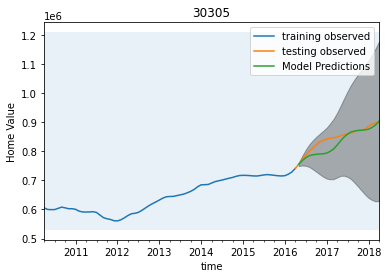

SARIMA Model Result for 30306


,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.8640,0.075,11.518,0.000,0.717,1.011
ma.L1,0.7302,0.137,5.311,0.000,0.461,1.000
ma.S.L12,0.0062,0.057,0.109,0.913,-0.106,0.118
sigma2,2.598e+06,7.15e-09,3.63e+14,0.000,2.6e+06,2.6e+06


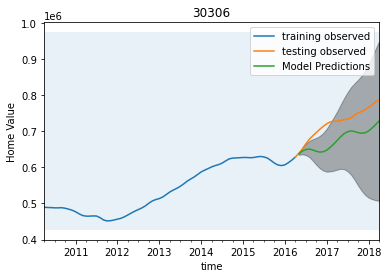

SARIMA Model Result for 30307


,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.6206,0.124,5.000,0.000,0.377,0.864
ma.L1,0.7587,0.168,4.518,0.000,0.430,1.088
ma.S.L12,-0.0253,0.108,-0.234,0.815,-0.237,0.186
sigma2,3.263e+06,2.9e-09,1.12e+15,0.000,3.26e+06,3.26e+06


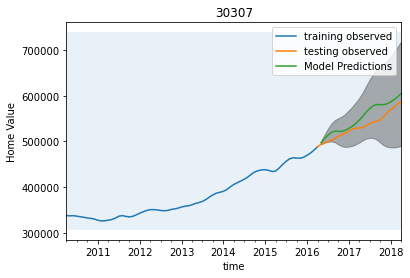

SARIMA Model Result for 30308


,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.6979,0.094,7.398,0.000,0.513,0.883
ma.L1,0.7582,0.106,7.148,0.000,0.550,0.966
ma.S.L12,-0.0576,0.059,-0.983,0.326,-0.173,0.057
sigma2,5.549e+06,4.59e-09,1.21e+15,0.000,5.55e+06,5.55e+06


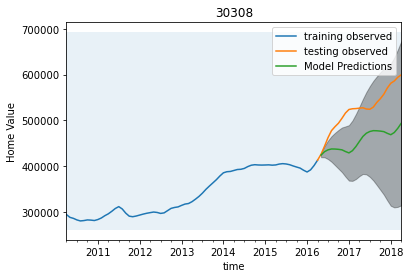

SARIMA Model Result for 30309


,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.9139,0.090,10.196,0.000,0.738,1.090
ma.L1,0.0477,0.079,0.603,0.546,-0.107,0.203
ar.S.L12,-0.8607,0.173,-4.974,0.000,-1.200,-0.522
ma.S.L12,0.0002,0.139,0.001,0.999,-0.272,0.272
sigma2,1.422e+07,1.54e-09,9.22e+15,0.000,1.42e+07,1.42e+07


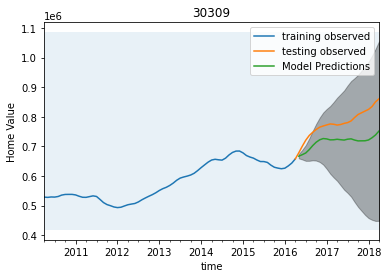

SARIMA Model Result for 30316


,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.9240,0.069,13.381,0.000,0.789,1.059
ma.L1,0.6245,0.111,5.645,0.000,0.408,0.841
ma.S.L12,-0.2092,0.081,-2.584,0.010,-0.368,-0.051
sigma2,6.613e+05,1.55e+05,4.271,0.000,3.58e+05,9.65e+05


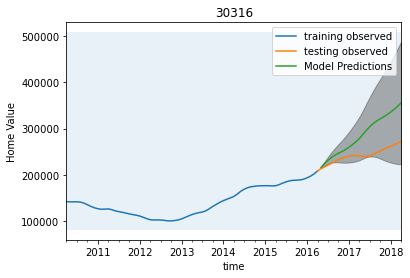

SARIMA Model Result for 30317


,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.6287,0.150,4.187,0.000,0.334,0.923
ma.L1,0.6766,0.133,5.082,0.000,0.416,0.938
ma.S.L12,-7.5045,2.454,-3.058,0.002,-12.314,-2.695
sigma2,2.513e+04,1.5e+04,1.676,0.094,-4264.147,5.45e+04


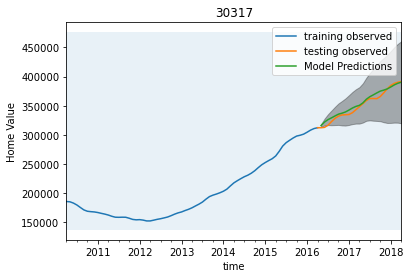

SARIMA Model Result for 30324


,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.6669,0.107,6.241,0.000,0.457,0.876
ma.L1,0.7749,0.114,6.827,0.000,0.552,0.997
ma.S.L12,0.0265,0.090,0.294,0.769,-0.150,0.203
sigma2,1.992e+06,3.83e+05,5.206,0.000,1.24e+06,2.74e+06


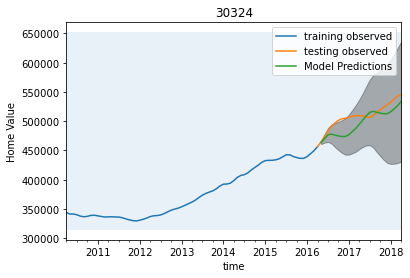

SARIMA Model Result for 30326


,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.7439,0.146,5.106,0.000,0.458,1.029
ma.L1,0.1611,0.068,2.376,0.018,0.028,0.294
ar.S.L12,-0.5760,0.186,-3.097,0.002,-0.941,-0.211
ma.S.L12,-0.0143,0.027,-0.531,0.595,-0.067,0.038
sigma2,1.191e+07,1.94e-09,6.13e+15,0.000,1.19e+07,1.19e+07


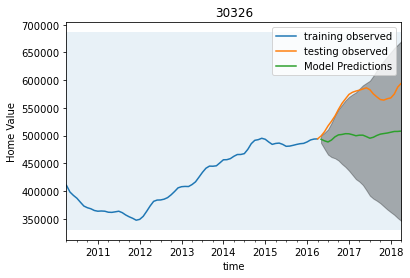

SARIMA Model Result for 30327


,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.5624,0.175,3.214,0.001,0.219,0.905
ma.L1,0.7699,0.114,6.775,0.000,0.547,0.993
ma.S.L12,0.0406,0.080,0.508,0.612,-0.116,0.197
sigma2,1.405e+07,2.82e-09,4.97e+15,0.000,1.41e+07,1.41e+07


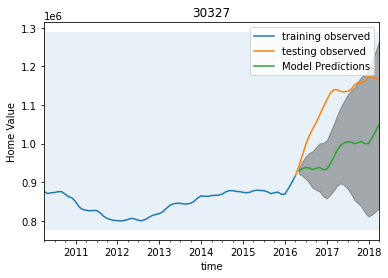

SARIMA Model Result for 30331


,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.8782,0.077,11.359,0.000,0.727,1.030
ma.L1,0.5462,0.147,3.705,0.000,0.257,0.835
ar.S.L12,0.0541,0.049,1.110,0.267,-0.041,0.150
ma.S.L12,-0.4738,0.171,-2.774,0.006,-0.809,-0.139
sigma2,1.938e+05,4.24e+04,4.576,0.000,1.11e+05,2.77e+05


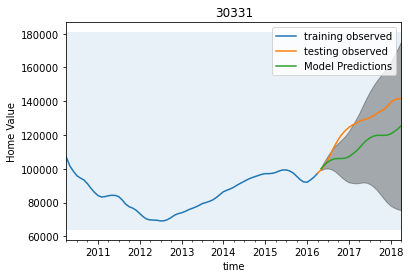

SARIMA Model Result for 30363


,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.7622,0.192,3.971,0.000,0.386,1.138
ma.L1,0.7055,0.178,3.953,0.000,0.356,1.055
ma.S.L12,-0.0697,0.071,-0.984,0.325,-0.208,0.069
sigma2,4.545e+06,2.81e-09,1.62e+15,0.000,4.55e+06,4.55e+06


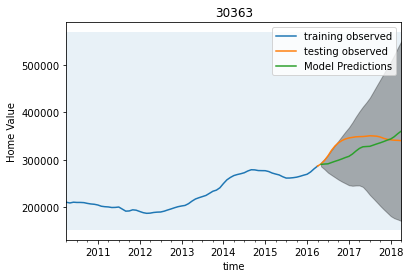

In [33]:
# Run best model parameters across ZIPs

# create table to hold resulting MSE, RMSE across ZIPS
summary_table = pd.DataFrame()
Zipcode = []
MSE_Value = []
RMSE_Value = []

# create dictionaries for each ZIP
confidences = {}
figures = {}
models = {}

# iterate through each unique zip code
for name in ls_unique_zips:
    temp_orders = potential_parameters[name] # temporary parameter container for ZIP
    best_para = temp_orders.loc[temp_orders['AIC'].idxmin()] # use lowest AIC score


    ARIMA_MODEL = sm.tsa.SARIMAX(train_dict[name],
                                 order = best_para['pdq'],
                                 seasonal_order = best_para['pdqs'],
                                 enforce_stationarity = False,
                                 enforce_invertibility = False,
                                 )
    
    output = ARIMA_MODEL.fit()
    print('SARIMA Model Result for {}'.format(name))
   
    # print initial summary
    display(output.summary().tables[1])
    plt.show()
    # loads model output for each zip code into dictionary
    models[name] = output
    output = models[name]
    # function to get the current figure from the loop
    fig = plt.gcf()
    # load plot into dictionary
    figures[name] = fig
    
    # 2 years prediction comparison
    prediction = output.get_forecast(steps=24, 
                                     dynamic=False, full_results = True)
    pred_conf = prediction.conf_int()
    # input confidence intervals
    confidences[name] = pred_conf
    zip_forecasted = prediction.predicted_mean
    zip_truth = test_dict[name]
    

    # determine rmse and mse values
    rmse = np.sqrt(((zip_forecasted - zip_truth)**2).mean())
    mse = ((zip_forecasted - zip_truth)**2).mean()
    
    Zipcode.append(name)
    RMSE_Value.append(rmse)
    MSE_Value.append(mse)
    
    # plot predictions and confidence intervals across ZIPS
    ax = train_dict[name].plot(label='training observed')
    test_dict[name].plot(label='testing observed', ax=ax)


    prediction.predicted_mean.plot(label='Model Predictions', ax=ax)
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='k', alpha=0.3)

    
    ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2010-04-30'), 
                     prediction.predicted_mean.index[-1], alpha=.1, zorder=-1)

    ax.set_ylabel('Home Value')
    ax.set_title(str(name))
   
    plt.legend()
    plt.show()

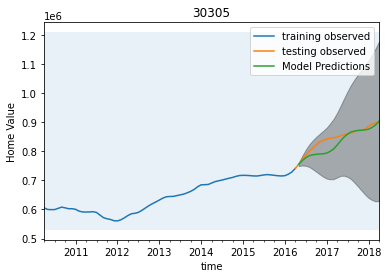

In [35]:
# preview first ZIP code's forecast
figures[30305]

In [36]:
# see results across ZIP codes
summary_table = pd.DataFrame() # makes dataframe for mse/rmse of each zip code
Zipcode = [] # creates lists of each zip code, mse and rmse score for summary
MSE_Value = []
RMSE_Value = []
summary_table['Zipcode'] = Zipcode 
summary_table['MSE'] = MSE_Value
summary_table['RMSE'] = RMSE_Value
summary_table

,Zipcode,MSE,RMSE
0,30305,5.448448e+08,23341.909981
1,30306,2.754315e+09,52481.570639
2,30307,4.173095e+08,20428.155180
3,30308,5.632590e+09,75050.583885
4,30309,4.764097e+09,69022.439816
5,30316,2.620180e+09,51187.698571
6,30317,3.022593e+07,5497.811752
7,30324,2.944046e+08,17158.223666
8,30326,4.317529e+09,65707.907884
9,30327,1.920187e+10,138570.797744


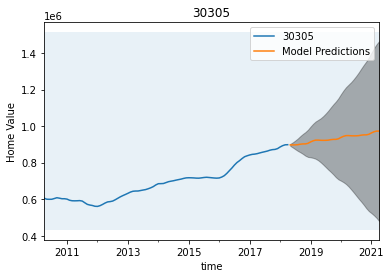

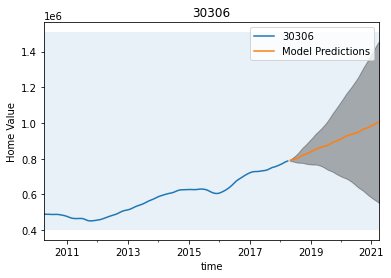

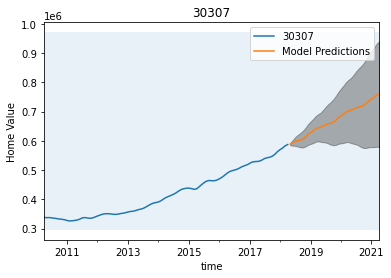

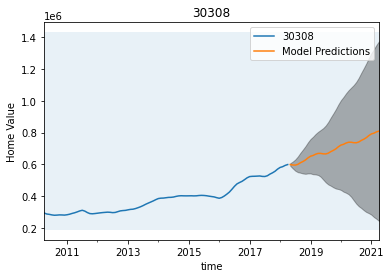

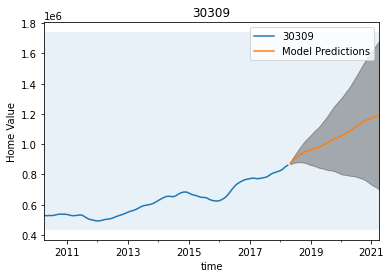

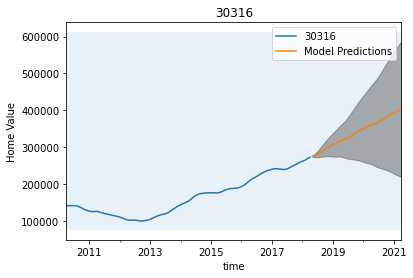

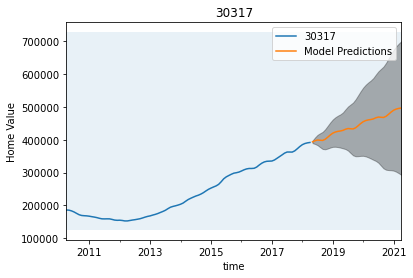

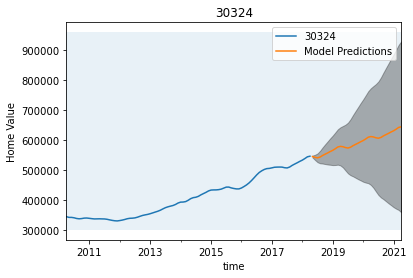

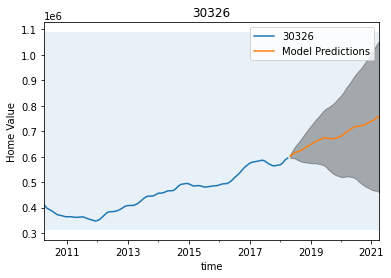

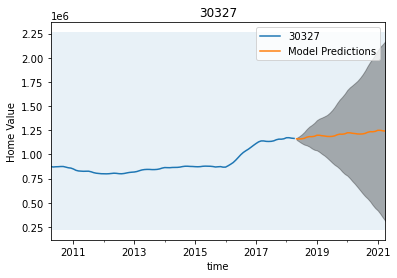

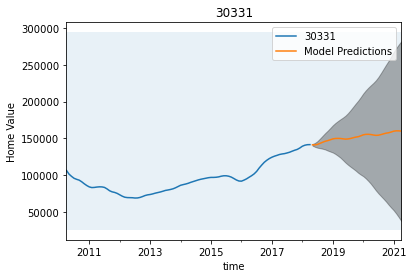

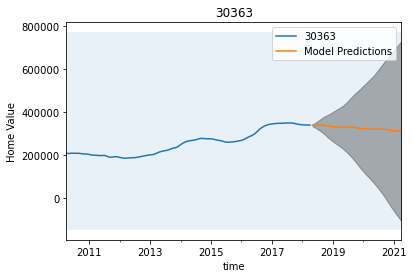

<Figure size 432x288 with 0 Axes>

In [45]:
# Use the winning parameters across ZIP codes and forecast

summary_table = pd.DataFrame()
forecast_table = pd.DataFrame()
Zipcode = []
MSE_Value = []
RMSE_Value = []
current = []
forecast_3Yr = []
conf_3Yr_L=[]
conf_3Yr_U=[]

figures = {}
confidences = {}
models = {}

for name in ls_unique_zips:
    temp_orders = potential_parameters[name]
    best_para = temp_orders.loc[temp_orders['AIC'].idxmin()]

    ARIMA_MODEL = sm.tsa.SARIMAX(atl_zips[name],
                                 order = best_para['pdq'],
                                 seasonal_order = best_para['pdqs'],
                                 enforce_stationarity = False,
                                 enforce_invertibility = False,
                                 )
    
    output = ARIMA_MODEL.fit()

    models[name] = output
    output = models[name]        
    fig = plt.gcf()
    figures[name] = fig
        
    prediction = output.get_forecast(steps=36, 
                                     dynamic=False, full_results = True)
    pred_conf = prediction.conf_int()
    confidences[name] = pred_conf
    zip_forecasted = prediction.predicted_mean
    zip_truth = atl_zips[name]
    
    
    confidences[name] = pred_conf

    
    rmse = np.sqrt(((zip_forecasted - zip_truth)**2).mean())
    mse = ((zip_forecasted - zip_truth)**2).mean()

    Zipcode.append(name)
    RMSE_Value.append(rmse)
    MSE_Value.append(mse)
    
    ax = atl_zips[name].plot(label=name)



    prediction.predicted_mean.plot(label='Model Predictions', ax=ax)
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='k', alpha=0.3)

    
    ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2010-04-30'), 
                     prediction.predicted_mean.index[-1], alpha=.1, zorder=-1)

    ax.set_ylabel('Home Value')
    ax.set_title(name)
   
    plt.legend()
    plt.show()
    fig = plt.gcf()
    figures[name] = fig
    
    # predictions across three year span
    pred_3 = output.get_forecast(steps = 36)
    pred_conf_3 = pred_3.conf_int()
    forecast_3 = pred_3.predicted_mean.to_numpy()[-1]
    current.append(atl_zips[name]['2018-04'][0])
    
    # confidence levels across ZIPs
    forecast_3Yr.append(forecast_3)
    conf_3Yr_L.append(pred_conf_3.iloc[:, 0][-1])
    conf_3Yr_U.append(pred_conf_3.iloc[:, 1][-1])

If we determine we'd like to invest in the ZIP codes where there's the greatest chance of ROI and we have the best prediction capabilities. We can then invest with what we've deemed is solid intel.

Let's compare across our ZIP codes to see which come out on top.

# Step 6: Interpreting Results

In [46]:
# makes a dataset with future values and ROIs for all zip codes
forecast_table['Zipcode'] = Zipcode
forecast_table['Current Value'] = current
forecast_table['3 Year Forecast'] = forecast_3Yr
forecast_table['Lower Expectation'] = conf_3Yr_L
forecast_table['Upper Expectation'] = conf_3Yr_U

# ROI calculation
forecast_table['ROI']=((forecast_table['3 Year Forecast'] 
                            - forecast_table['Current Value'])
                           /forecast_table['Current Value']*100)
forecast_table['ROI-Lower']=(forecast_table['Lower Expectation']
                                 - forecast_table['Current Value']) /forecast_table['Current Value']
forecast_table['ROI-Upper']=(forecast_table['Upper Expectation'] 
                                 - forecast_table['Current Value'])/forecast_table['Current Value']
    
summary_table['Zipcode'] = Zipcode
summary_table['MSE'] = MSE_Value
summary_table['RMSE'] = RMSE_Value

In [47]:
# compare resulting ZIP code forecast, sort by associated ROI
forecast_table.sort_values('ROI', ascending = False).head()

,Zipcode,Current Value,3 Year Forecast,Lower Expectation,Upper Expectation,ROI,ROI-Lower,ROI-Upper
5,30316,272500.0,4.034072e+05,219247.249280,5.875671e+05,48.039338,-0.195423,1.156210
4,30309,860700.0,1.191338e+06,702015.530661,1.680660e+06,38.414970,-0.184367,0.952666
3,30308,599300.0,8.098513e+05,244728.238434,1.374974e+06,35.132867,-0.591643,1.294301
2,30307,587100.0,7.596463e+05,578600.965211,9.406916e+05,29.389587,-0.014476,0.602268
1,30306,787000.0,1.004930e+06,551752.286721,1.458107e+06,27.691210,-0.298917,0.852741


Above we can see our degree of confidence which can be improved with time, but clearly shows who our winners are. These five ZIP codes are worth targeting based on our models and validation.

## Reigning ZIP Codes!

1. 30316
2. 30309
3. 30308
4. 30307
5. 30306